In [28]:
import os
import pandas as pd
import numpy as np 
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from PIL import Image, ImageDraw
import json

# Reading the data

In [29]:

json_path = 'archive/test/_annotations.coco.json'

with open(json_path,'r') as file:
    data = json.load(file)

In [30]:
data.keys()

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])

In [31]:
data['images']

[{'id': 0,
  'license': 1,
  'file_name': '1706_jpg.rf.004b87f63425ef145855aab826e33eee.jpg',
  'height': 640,
  'width': 640,
  'date_captured': '2023-08-19T04:37:54+00:00'},
 {'id': 1,
  'license': 1,
  'file_name': '1363_jpg.rf.01c4537b57f360820b9e00c7e0c99ae1.jpg',
  'height': 640,
  'width': 640,
  'date_captured': '2023-08-19T04:37:54+00:00'},
 {'id': 2,
  'license': 1,
  'file_name': '1136_jpg.rf.02df64849485272e48139498c36c8e44.jpg',
  'height': 640,
  'width': 640,
  'date_captured': '2023-08-19T04:37:54+00:00'},
 {'id': 3,
  'license': 1,
  'file_name': '2210_jpg.rf.039c38182fe783c69dd28160e5ef02a0.jpg',
  'height': 640,
  'width': 640,
  'date_captured': '2023-08-19T04:37:54+00:00'},
 {'id': 4,
  'license': 1,
  'file_name': '2058_jpg.rf.04e8e79db0fbf2459585ce3954f50739.jpg',
  'height': 640,
  'width': 640,
  'date_captured': '2023-08-19T04:37:54+00:00'},
 {'id': 5,
  'license': 1,
  'file_name': '1977_jpg.rf.0a1d1161a2926a804824bbf61cec52f9.jpg',
  'height': 640,
  'width'

In [32]:
data['annotations'][0]

{'id': 0,
 'image_id': 0,
 'category_id': 2,
 'bbox': [324, 231, 111.25, 76.25],
 'area': 8482.813,
 'segmentation': [[435,
   231.25,
   323.75,
   231.25,
   323.75,
   307.5,
   435,
   307.5,
   435,
   231.25]],
 'iscrowd': 0}

Bbox is a box with a tumor in it

In [33]:
data['categories']

[{'id': 0, 'name': 'Tumor', 'supercategory': 'none'},
 {'id': 1, 'name': '0', 'supercategory': 'Tumor'},
 {'id': 2, 'name': '1', 'supercategory': 'Tumor'}]

# Visualization

Let's create a mask to show the tumors on the pictures

In [34]:
def mask(img_names, data):
    _, ax = plt.subplots(2, 2, figsize=(15, 15))
    
    transform = transforms.ToTensor()
    
    for i, img_name in enumerate(img_names):
        img = Image.open(img_name)
        img_filename = os.path.basename(img_name)
        img_id = [item for item in data['images'] if item['file_name'] == img_filename][0]['id']
        img_mask = [mask for mask in data['annotations'] if mask['image_id'] == img_id]
        
        bbox = img_mask[0]['bbox']
        x, y, width, height = bbox
        
        img_tensor = transform(img)
        img_pil = transforms.ToPILImage()(img_tensor)
        draw = ImageDraw.Draw(img_pil)
        draw.rectangle([x, y, x + width, y + height], outline="red", width=3)
        
        ax[i // 2, i % 2].imshow(img_pil)
    
    

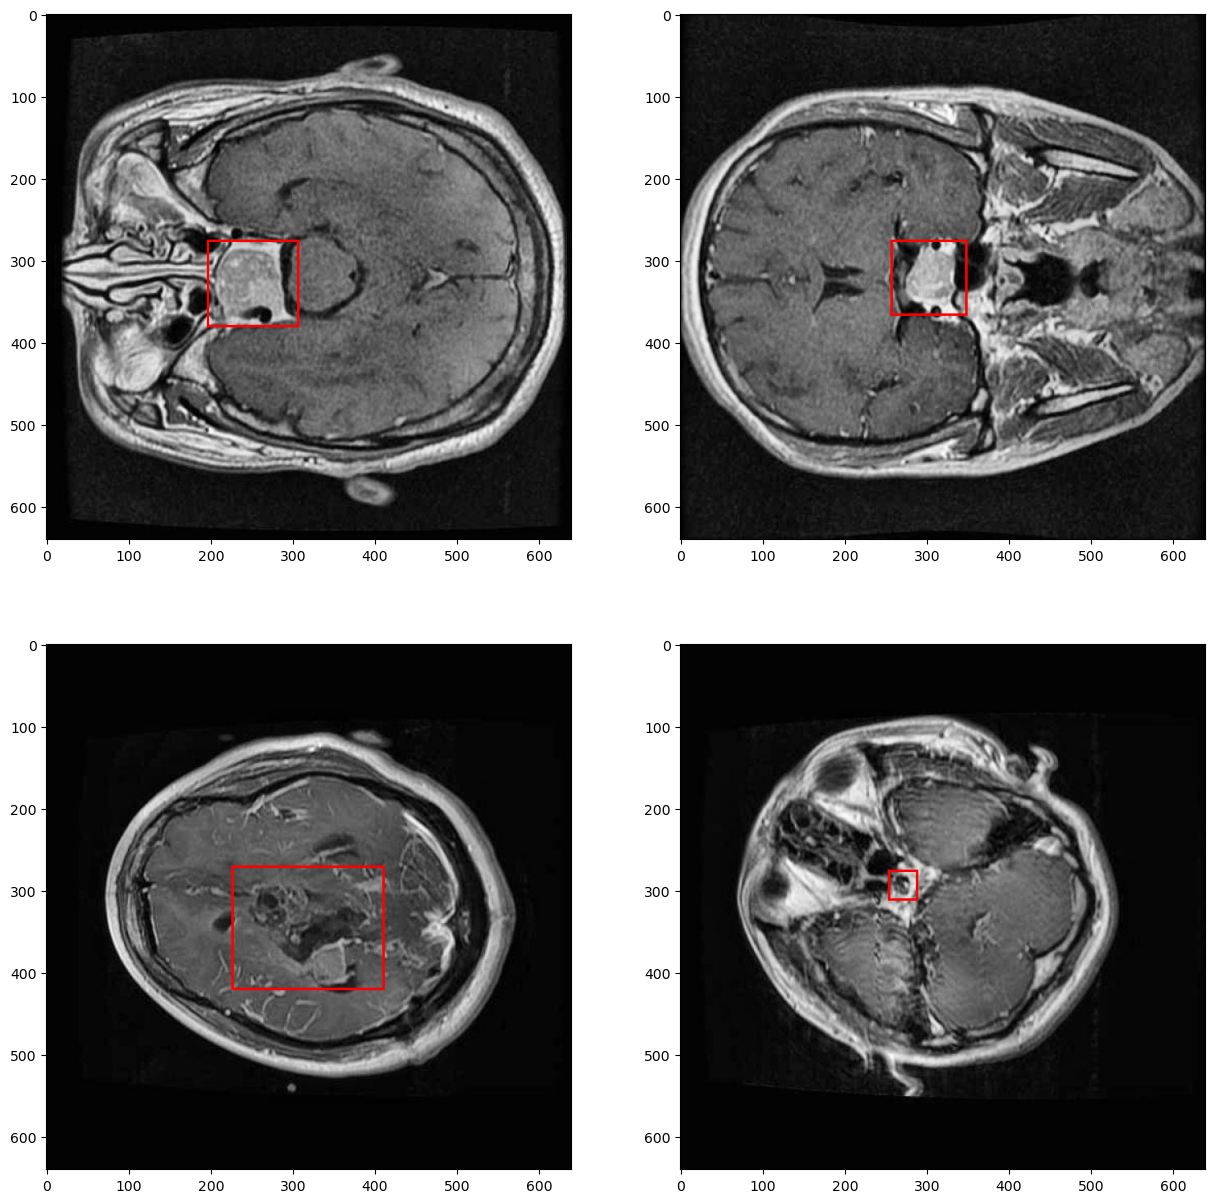

In [35]:
with open(json_path,'r') as file:
    data = json.load(file)

img_dir = "archive/test"
all_img_files = [os.path.join(img_dir,img['file_name']) for img in data['images']]
random_file =all_img_files[1:5]
mask(random_file,data)

# Convert to mask

In [36]:

import tifffile
def create_mask(images, annotations, output_folder, max_print=3):
    mask_tensor = torch.zeros((images['height'], images['width']), dtype=torch.uint8)
    i = 0
    
    for ann in annotations:
        if images['id'] == ann['image_id']:
            bbox = ann['bbox']
            x, y, width, height = map(int, bbox)  # Convert to integers
            
            bbox_mask = torch.zeros_like(mask_tensor, dtype=torch.uint8)
            bbox_mask[y:y+height, x:x+width] = 255
            
            bbox_mask_np = bbox_mask.numpy()
            mask_path = os.path.join(output_folder, f"{images['file_name'].replace('.jpg', '')}_bbox_{i}.tif")
            tifffile.imwrite(mask_path, bbox_mask_np)
            
            i += 1
            



In [37]:


for img in data['images'] :
        create_mask(img, data['annotations'] , 'train/masks')


In [38]:

json_path = 'archive/test/_annotations.coco.json'

with open(json_path,'r') as file:
    data = json.load(file)

In [39]:
for img in data['images'] :
        create_mask(img, data['annotations'] , 'test/masks')


In [40]:

json_path = 'archive/valid/_annotations.coco.json'

with open(json_path,'r') as file:
    data = json.load(file)

In [41]:
for img in data['images'] :
        create_mask(img, data['annotations'] , 'valid/masks')


In [ ]:
data['images']

[{'id': 0,
  'license': 1,
  'file_name': '1997_jpg.rf.57e306420710246d04c0d5c26e6496c6.jpg',
  'height': 640,
  'width': 640,
  'date_captured': '2023-08-19T04:37:54+00:00'},
 {'id': 1,
  'license': 1,
  'file_name': '2422_jpg.rf.59a35b6d8d2eed150af8535cf09bbde5.jpg',
  'height': 640,
  'width': 640,
  'date_captured': '2023-08-19T04:37:54+00:00'},
 {'id': 2,
  'license': 1,
  'file_name': '1630_jpg.rf.5afc6e25d7987503a11bcb0791b60b53.jpg',
  'height': 640,
  'width': 640,
  'date_captured': '2023-08-19T04:37:54+00:00'},
 {'id': 3,
  'license': 1,
  'file_name': '1330_jpg.rf.5b23bf18a29b0f50e376b19a5a84f823.jpg',
  'height': 640,
  'width': 640,
  'date_captured': '2023-08-19T04:37:54+00:00'},
 {'id': 4,
  'license': 1,
  'file_name': '2768_jpg.rf.5b87c0023909e0789a33185a3aab92e9.jpg',
  'height': 640,
  'width': 640,
  'date_captured': '2023-08-19T04:37:54+00:00'},
 {'id': 5,
  'license': 1,
  'file_name': '2647_jpg.rf.5ba404374f2d670f04a2d1367c77c039.jpg',
  'height': 640,
  'width'

In [ ]:
for i in data['images']: 
    if i['file_name'].endswith('.json'):
        print(i)

In [ ]:
data['images'][0]['file_name'].endswith('.jpg')

True

In [4]:
def compare_folders(folder1,folder2):
    folder1_items = os.listdir(folder1)
    folder2_items = os.listdir(folder2)
    
    for item1 in folder1_items:
        f =False
        
        for j in folder2_items:
            if item1[:4] == j[:4]:
                f=True
                break
        if not f:
            print(f"Corresponding item for {item1} not found.")
            item1_path = os.path.join(folder1, item1)
            os.remove(item1_path)
            print(f"Deleted {item1}")
            
    for item2 in folder2_items:
        f =False
        
        for j in folder1_items:
            if item2[:4] == j[:4]:
                f=True
                break
        if not f:
            print(f"Corresponding item for {item2} not found.")
            item2_path = os.path.join(folder2, item2)
            os.remove(item2_path)
            print(f"Deleted {item1}")

folder1_path = "archive/valid"
folder2_path = "valid/masks"
compare_folders(folder1_path, folder2_path)


# Datasets

In [5]:
class BrainDatasetPlot(torch.utils.data.Dataset):
    def __init__(self, dir, transform=None, mask_transform=None):
        self.image_f = os.path.join('archive/', dir)
        self.mask_f = os.path.join( dir, 'masks')
        self.images = sorted(os.listdir(self.image_f))
        self.masks = sorted(os.listdir(self.mask_f))
        self.transform = transform
        self.mask_transform = mask_transform
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, index):
        img_name = self.images[index]
        mask_name = self.masks[index]
        
        img_path = os.path.join(self.image_f, img_name)
        img = Image.open(img_path).convert("RGB")
        img = np.array(img)
        # img = transforms.ToTensor()(img)
        # if self.transform:
        #     img = self.transform(img)

        
        mask_path = os.path.join(self.mask_f, mask_name)
        mask = Image.open(mask_path).convert("L")
        
        # mask = transforms.ToTensor()(mask)
        # if self.mask_transform:
        #     mask = self.mask_transform(mask)

        
        return img, mask
    

dataset = BrainDatasetPlot('train', transform=transforms.ToTensor(), mask_transform=transforms.ToTensor())

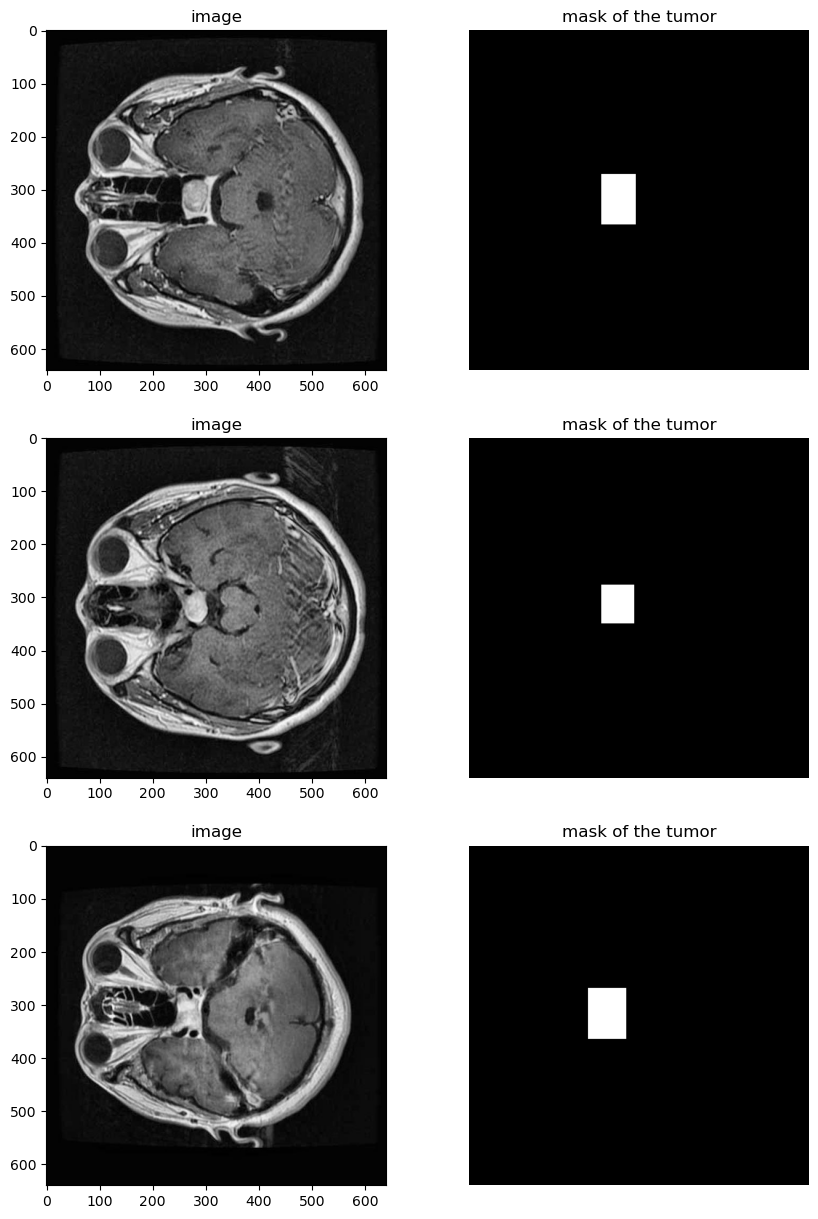

In [6]:
fig,axs = plt.subplots(3,2,figsize=(10,15))
for i in range(3):  
    image, mask = dataset[i]
    axs[i, 0].imshow(image)
    axs[i, 0].set_title('image')
    axs[i, 1].imshow(mask, cmap='gray')
    axs[i, 1].set_title('mask of the tumor')
    axs[i, 1].axis('off')


In [7]:


class BrainDataset(torch.utils.data.Dataset):
    def __init__(self, dir, transform=None):
        self.image_folder = os.path.join('archive/', dir)
        self.mask_folder = os.path.join( dir, 'masks')

        self.image_files = {os.path.splitext(f)[0] for f in os.listdir(self.image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))}
        self.mask_files = {os.path.splitext(f)[0] for f in os.listdir(self.mask_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))}
        
        
        self.image_files = sorted(os.listdir(self.image_folder))
        self.mask_files = sorted(os.listdir(self.mask_folder))
        

        self.transform = transform
        
    
    def __len__(self):
        return len(self.image_files)
    
    def __getitem__(self,idx):
        img_name = self.image_files[idx]
        img_path = os.path.join(self.image_folder, img_name)
        image = Image.open(img_path).convert("RGB")
        # image_gray = image.convert("L")  # Convert to grayscale
        mask_name = self.mask_files[idx]
        mask_path = os.path.join(self.mask_folder, mask_name)
        mask = Image.open(mask_path).convert("L")
        
        if self.transform:
            
            image = self.transform(image)
            mask = self.transform(mask)
        return image,mask

In [8]:
image_transform = transforms.Compose([
    transforms.Resize(224),
    
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.clamp(0, 1))
])


In [9]:
train_dataset = BrainDataset('train', transform=image_transform)
val_dataset = BrainDataset('valid', transform=image_transform)
test_dataset = BrainDataset('test', transform=image_transform)

In [10]:
from  torch.utils.data import DataLoader


train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
valid_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Model

In [11]:
import torch.nn as nn
import torch.nn.functional as F
import pytorch_lightning as pl

## Loss

In [12]:
import torch.nn.functional as F
class DiceBCELoss(nn.Module):
    def __init__(self):
        super(DiceBCELoss,self).__init__()
    
    def forward(self, inputs, targets, smooth=1):

        
        inputs = torch.sigmoid(inputs)

        
        inputs = inputs.view(-1)
        targets = targets.view(-1)

        intersection = (inputs * targets).sum()
        dice_loss = 1 - (2.*intersection + smooth)/(inputs.sum() + targets.sum() + smooth)
        BCE = F.binary_cross_entropy(inputs, targets, reduction='mean')
        Dice_BCE = BCE + dice_loss

        return Dice_BCE
        
    

In [13]:
class UUUNet(pl.LightningModule):
    def __init__(self):
        super(UUUNet, self).__init__()
        
        # Encoder
        self.encoder1 = self.double_conv(3, 64)
        self.encoder2 = self.double_conv(64, 128)
        self.encoder3 = self.double_conv(128, 256)
        
        # Bottleneck
        self.bottleneck = self.double_conv(256, 512)
        
        # Decoder
        self.upconv3 = self.up_conv(512, 256)
        self.decoder3 = self.double_conv(512, 256)
        
        self.upconv2 = self.up_conv(256, 128)
        self.decoder2 = self.double_conv(256, 128)
        
        self.upconv1 = self.up_conv(128, 64)
        self.decoder1 = self.double_conv(128, 64)
        
        self.final_conv = nn.Conv2d(64, 1, kernel_size=1)
        self.loss_fn = DiceBCELoss()
        
    def double_conv(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )
        
    def up_conv(self, in_channels, out_channels):
        return nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2)
        
    def forward(self, x):
        # Encoder
        enc1 = self.encoder1(x)
        enc2 = self.encoder2(F.max_pool2d(enc1, 2))
        enc3 = self.encoder3(F.max_pool2d(enc2, 2))
        
        # Bottleneck
        bottleneck = self.bottleneck(F.max_pool2d(enc3, 2))
        
        # Decoder
        dec3 = self.upconv3(bottleneck)
        dec3 = torch.cat((enc3, dec3), dim=1)
        dec3 = self.decoder3(dec3)
        
        dec2 = self.upconv2(dec3)
        dec2 = torch.cat((enc2, dec2), dim=1)
        dec2 = self.decoder2(dec2)
        
        dec1 = self.upconv1(dec2)
        dec1 = torch.cat((enc1, dec1), dim=1)
        dec1 = self.decoder1(dec1)
        
        return self.final_conv(dec1)
    
    def training_step(self, batch, batch_idx):
        images, masks = batch
        outputs = self.forward(images)
        loss = self.loss_fn(outputs, masks)
        self.log('train_loss', loss)
        if batch_idx % 40 == 0:
            print(f"Train loss: {loss} on epoch {self.current_epoch}")
        
        return loss
    
    def validation_step(self, batch, batch_idx):
        images, masks = batch
        outputs = self.forward(images)
        loss = self.loss_fn(outputs, masks)
        self.log('val_loss', loss)
        print(f"Validation loss: {loss} on epoch {self.current_epoch}")
        return loss
    
    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=1e-4)

# Training

In [14]:
model = UUUNet()
model = model.to('mps')

trainer = pl.Trainer(max_epochs=5)
trainer.fit(model, train_loader, valid_loader)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/dmitrii_sakharov/anaconda3/envs/hw_iad/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default

   | Name       | Type            | Params
------------------------------------------------
0  | encoder1   | Sequential      | 39.0 K
1  | encoder2   | Sequential      | 221 K 
2  | encoder3   | Sequential      | 886 K 
3  | bottleneck | Sequential      | 3.5 M 
4  | upconv3    | ConvTran

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/Users/dmitrii_sakharov/anaconda3/envs/hw_iad/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Validation loss: 1.6613284349441528 on epoch 0
Validation loss: 1.6475634574890137 on epoch 0


/Users/dmitrii_sakharov/anaconda3/envs/hw_iad/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Train loss: 1.5990662574768066 on epoch 0
Train loss: 1.3410590887069702 on epoch 0
Train loss: 1.2035889625549316 on epoch 0
Train loss: 1.15398371219635 on epoch 0
Train loss: 1.1502840518951416 on epoch 0


Validation: |          | 0/? [00:00<?, ?it/s]

Validation loss: 1.1648833751678467 on epoch 0
Validation loss: 1.144378423690796 on epoch 0
Validation loss: 1.0645637512207031 on epoch 0
Validation loss: 1.163004994392395 on epoch 0
Validation loss: 1.170480728149414 on epoch 0
Validation loss: 1.0979690551757812 on epoch 0
Validation loss: 1.149271845817566 on epoch 0
Validation loss: 1.143143892288208 on epoch 0
Validation loss: 1.1880972385406494 on epoch 0
Validation loss: 1.1747030019760132 on epoch 0
Validation loss: 1.0939722061157227 on epoch 0
Validation loss: 1.1410717964172363 on epoch 0
Validation loss: 1.1942261457443237 on epoch 0
Validation loss: 1.118298053741455 on epoch 0
Validation loss: 1.1752667427062988 on epoch 0
Validation loss: 1.0672634840011597 on epoch 0
Validation loss: 1.1317834854125977 on epoch 0
Validation loss: 1.0877625942230225 on epoch 0
Validation loss: 1.049330234527588 on epoch 0
Validation loss: 1.1868515014648438 on epoch 0
Validation loss: 1.1868431568145752 on epoch 0
Validation loss: 1.0

Validation: |          | 0/? [00:00<?, ?it/s]

Validation loss: 1.239855408668518 on epoch 1
Validation loss: 1.2007778882980347 on epoch 1
Validation loss: 1.184930443763733 on epoch 1
Validation loss: 1.26353919506073 on epoch 1
Validation loss: 1.2083899974822998 on epoch 1
Validation loss: 1.1783711910247803 on epoch 1
Validation loss: 1.2700833082199097 on epoch 1
Validation loss: 1.2120002508163452 on epoch 1
Validation loss: 1.2026331424713135 on epoch 1
Validation loss: 1.2153006792068481 on epoch 1
Validation loss: 1.0988861322402954 on epoch 1
Validation loss: 1.1466065645217896 on epoch 1
Validation loss: 1.2226412296295166 on epoch 1
Validation loss: 1.108121633529663 on epoch 1
Validation loss: 1.2440879344940186 on epoch 1
Validation loss: 1.1618539094924927 on epoch 1
Validation loss: 1.2426637411117554 on epoch 1
Validation loss: 1.1567463874816895 on epoch 1
Validation loss: 1.1469130516052246 on epoch 1
Validation loss: 1.2976547479629517 on epoch 1
Validation loss: 1.3095049858093262 on epoch 1
Validation loss: 1

Validation: |          | 0/? [00:00<?, ?it/s]

Validation loss: 0.9055969715118408 on epoch 2
Validation loss: 0.9316062331199646 on epoch 2
Validation loss: 0.8528211712837219 on epoch 2
Validation loss: 1.0622565746307373 on epoch 2
Validation loss: 0.9908477663993835 on epoch 2
Validation loss: 0.7907151579856873 on epoch 2
Validation loss: 0.9190298318862915 on epoch 2
Validation loss: 0.9146444201469421 on epoch 2
Validation loss: 1.059373378753662 on epoch 2
Validation loss: 0.9980424642562866 on epoch 2
Validation loss: 0.940498411655426 on epoch 2
Validation loss: 1.0230510234832764 on epoch 2
Validation loss: 1.00255286693573 on epoch 2
Validation loss: 0.954323410987854 on epoch 2
Validation loss: 1.002740740776062 on epoch 2
Validation loss: 0.8435018062591553 on epoch 2
Validation loss: 0.9980827569961548 on epoch 2
Validation loss: 0.9016126394271851 on epoch 2
Validation loss: 0.8553906083106995 on epoch 2
Validation loss: 0.9165656566619873 on epoch 2
Validation loss: 0.9339780807495117 on epoch 2
Validation loss: 0.

Validation: |          | 0/? [00:00<?, ?it/s]

Validation loss: 0.8236219882965088 on epoch 3
Validation loss: 0.8185397982597351 on epoch 3
Validation loss: 0.683522641658783 on epoch 3
Validation loss: 0.7942050695419312 on epoch 3
Validation loss: 0.8220901489257812 on epoch 3
Validation loss: 0.741112470626831 on epoch 3
Validation loss: 0.7747637629508972 on epoch 3
Validation loss: 0.8016404509544373 on epoch 3
Validation loss: 0.9726638197898865 on epoch 3
Validation loss: 0.8013723492622375 on epoch 3
Validation loss: 0.744531512260437 on epoch 3
Validation loss: 0.8825452327728271 on epoch 3
Validation loss: 0.8480640649795532 on epoch 3
Validation loss: 0.7832769155502319 on epoch 3
Validation loss: 0.8623731136322021 on epoch 3
Validation loss: 0.6708889007568359 on epoch 3
Validation loss: 0.7662765383720398 on epoch 3
Validation loss: 0.6767160892486572 on epoch 3
Validation loss: 0.639833390712738 on epoch 3
Validation loss: 0.8062458038330078 on epoch 3
Validation loss: 0.8028396368026733 on epoch 3
Validation loss: 

Validation: |          | 0/? [00:00<?, ?it/s]

Validation loss: 0.7035154700279236 on epoch 4
Validation loss: 0.6294437050819397 on epoch 4
Validation loss: 0.5500452518463135 on epoch 4
Validation loss: 0.7643945217132568 on epoch 4
Validation loss: 0.7425003051757812 on epoch 4
Validation loss: 0.5301662683486938 on epoch 4
Validation loss: 0.5643271803855896 on epoch 4
Validation loss: 0.6307803392410278 on epoch 4
Validation loss: 0.989219069480896 on epoch 4
Validation loss: 0.8735169768333435 on epoch 4
Validation loss: 0.6788395643234253 on epoch 4
Validation loss: 0.8880044221878052 on epoch 4
Validation loss: 0.7992662191390991 on epoch 4
Validation loss: 0.9103890657424927 on epoch 4
Validation loss: 0.7559080123901367 on epoch 4
Validation loss: 0.5392922163009644 on epoch 4
Validation loss: 0.7012894749641418 on epoch 4
Validation loss: 0.644991934299469 on epoch 4
Validation loss: 0.5386853814125061 on epoch 4
Validation loss: 0.633845329284668 on epoch 4
Validation loss: 0.6518154144287109 on epoch 4
Validation loss:

`Trainer.fit` stopped: `max_epochs=5` reached.


In [ ]:
val_dataloader = DataLoader(val_dataset, batch_size=8, shuffle=False)

In [23]:
def visualize_input_output_target(input_image, output_image, target_image):
    # Move tensors to CPU memory if they are on CUDA devices
    input_image = input_image.cpu()
    output_image = output_image.cpu()
    target_image = target_image.cpu()

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot input image
    axes[0].imshow(input_image.permute(1, 2, 0).numpy(), cmap='gray')
    axes[0].set_title('Input Image')
    axes[0].axis('off')

    # Plot output image (predicted binary mask)
    axes[1].imshow(output_image.squeeze().numpy(), cmap='gray')
    axes[1].set_title('Output Image (Predicted)')
    axes[1].axis('off')

    # Plot target image (ground truth binary mask)
    axes[2].imshow(target_image.squeeze().numpy(), cmap='gray')
    axes[2].set_title('Target Image (Ground Truth)')
    axes[2].axis('off')

    plt.show()
    fig.savefig("output.png")

In [24]:
model.eval()

UUUNet(
  (encoder1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
  (encoder2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
  (encoder3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine

# Results

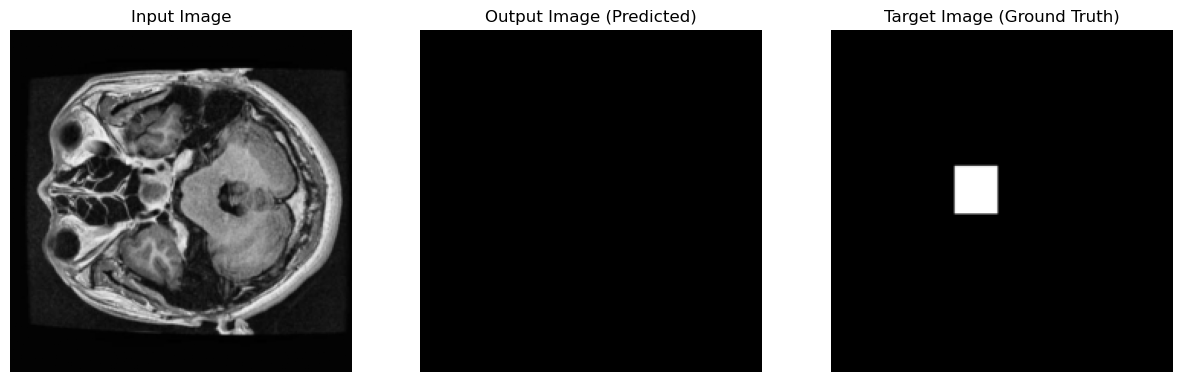

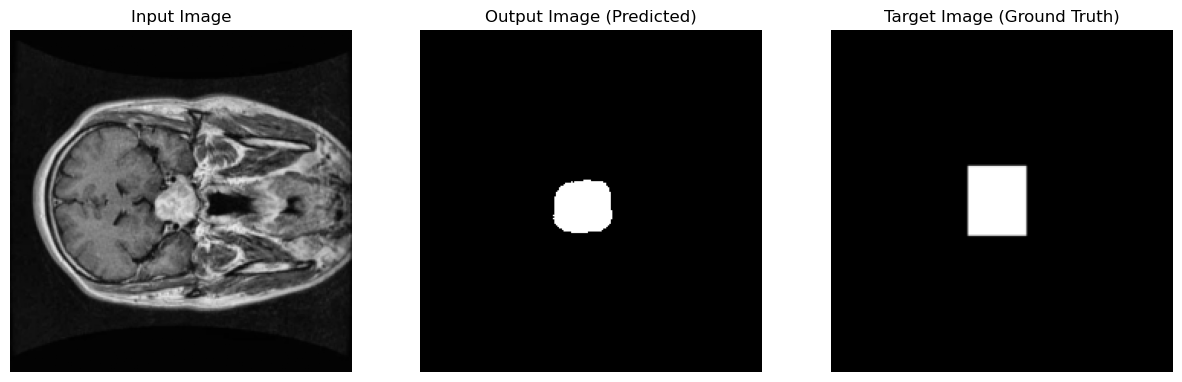

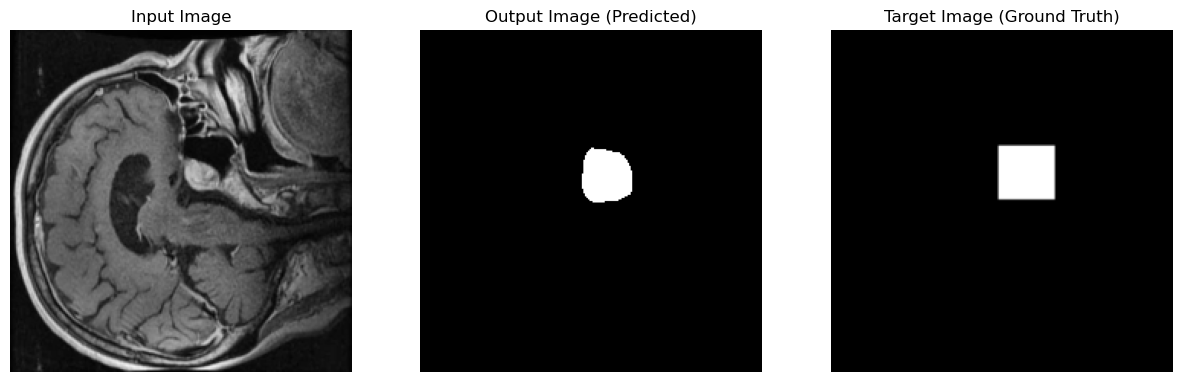

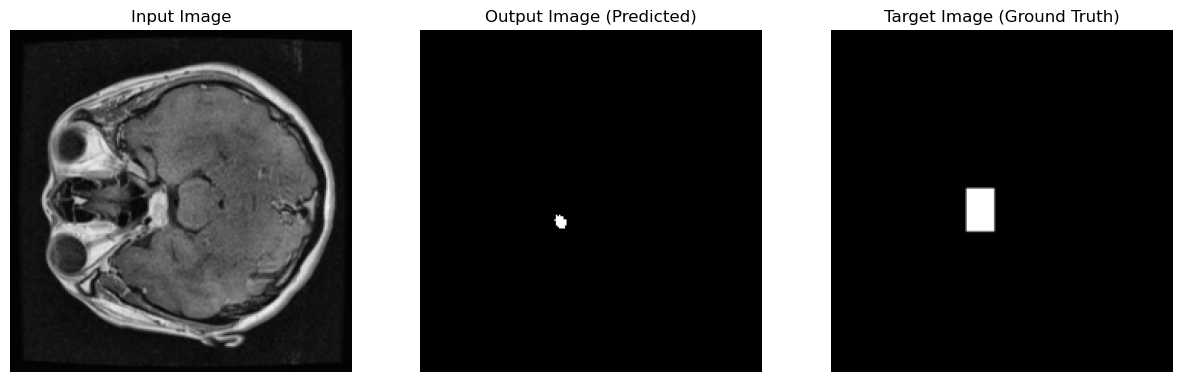

In [26]:
idx =1
model= model.to('cpu')
for x,y in test_loader:
    x  =x.to('cpu',dtype = torch.float32)
    y = y.to('cpu',dtype = torch.float32)
    
    pred = model(x)
    y_pred = (pred>0.5).float()
    if idx <5:
        visualize_input_output_target(x[0],y_pred[0],y[0])
    idx +=1

The inaccuracy of results is due the small amount of training epochs, with a lot of time quite high accuracy can be achieved